# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
∇Q(W)=\frac{1}{l}(-2X^Ty + 2X^TXw)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w}
    q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [4]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/96301189/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/96321087/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/96320336/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/96324897/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/96327805/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [117]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [118]:
data = pd.read_csv('autos.csv')

In [119]:
data.isna().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

In [120]:
data.dropna(inplace = True)

In [121]:
np.quantile(data['price'], q = 0.5)

4100.0

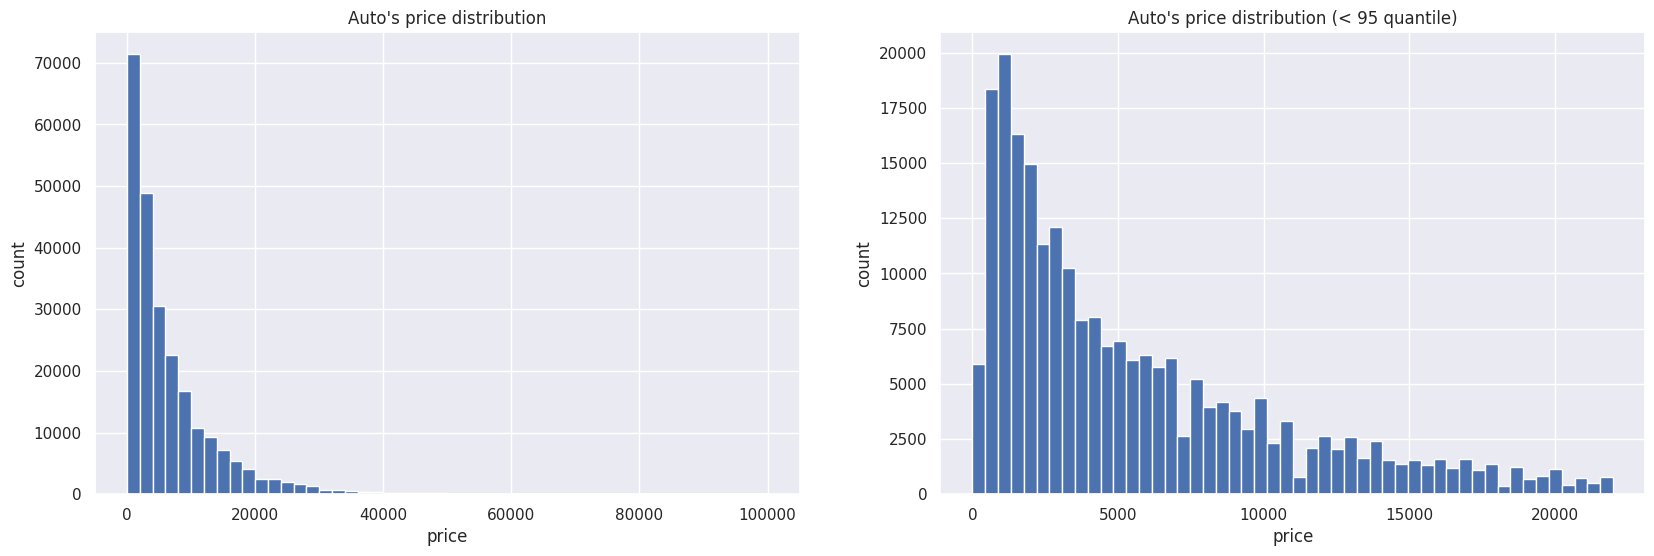

In [122]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.hist(data['price'], bins = 50)
plt.xlabel('price')
plt.ylabel('count')
plt.title("Auto's price distribution")
plt.subplot(1, 2, 2)
plt.hist(data[data['price'] <= np.quantile(data['price'], q = 0.95)]['price'], bins = 50)
plt.xlabel('price')
plt.ylabel('count')
plt.title("Auto's price distribution (< 95 quantile)")
plt.show()

Распределение похоже на лог-нормальное, поэтому заменим цену на логарифм цены

In [123]:
data['log_price'] = np.log(data['price'])
data.drop('price', axis = 1, inplace = True)

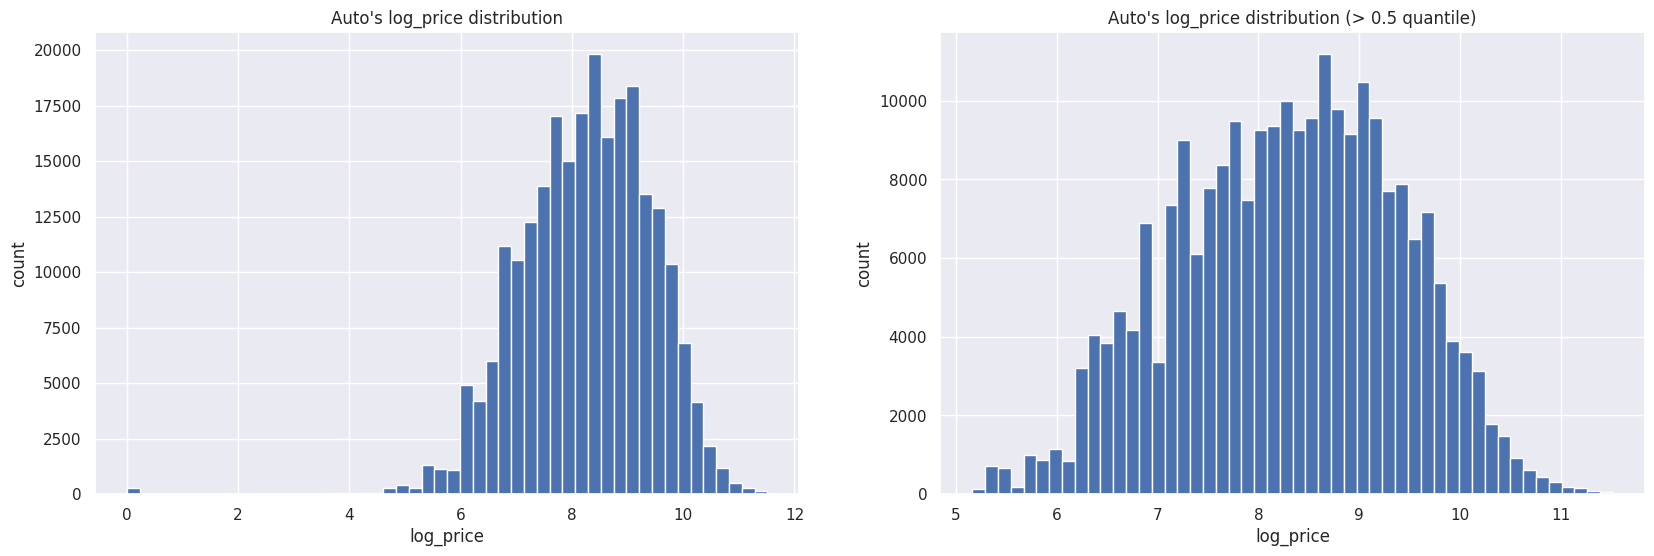

In [124]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.hist(data['log_price'], bins = 50)
plt.xlabel('log_price')
plt.ylabel('count')
plt.title("Auto's log_price distribution")
plt.subplot(1, 2, 2)
plt.hist(data[data['log_price'] >= np.quantile(data['log_price'], q = 0.005)]['log_price'], bins = 50)
plt.xlabel('log_price')
plt.ylabel('count')
plt.title("Auto's log_price distribution (> 0.5 quantile)")
plt.show()

In [125]:
data = data[data['log_price'] >= np.quantile(data['log_price'], q = 0.005)]

In [126]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
log_price            float64
dtype: object

In [127]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [207]:
for column in categorical:
  print(column, data[column].value_counts())


brand volkswagen       48875
bmw              29133
mercedes_benz    25432
audi             23843
opel             23581
ford             15630
renault          10405
peugeot           7247
fiat              5592
skoda             4364
seat              4327
mazda             3798
toyota            3517
citroen           3352
nissan            3262
mini              2794
hyundai           2653
smart             2572
volvo             2438
mitsubishi        1923
honda             1837
kia               1834
porsche           1678
alfa_romeo        1608
suzuki            1540
chevrolet         1229
chrysler           936
dacia              690
land_rover         600
jeep               568
subaru             510
jaguar             453
daihatsu           416
saab               404
lancia             291
daewoo             289
rover              239
lada               127
Name: brand, dtype: int64
model golf               19961
andere             18170
3er                14943
a4           

In [128]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

<ipython-input-128-45c460ddd792>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bias'] = 1


In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, shuffle = True, random_state = 42)

In [131]:
X_train = X_train.toarray()
X_test = X_test.toarray()
X_val = X_val.toarray()
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [132]:
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm

In [136]:
train_losses = dict()
test_losses = dict()
R2 = dict()
best_lambdas_ = dict()
n_iter = dict()
gd_models = ['full', 'stochastic', 'momentum', 'adam']

for gd_model in tqdm(gd_models):
  best_mse = 10 ** 10
  best_lambda_ = 10 ** 10
  for lambda_ in tqdm(np.logspace(-6, 1, 10)):
    model = LinearRegression(descent_config = {'descent_name': gd_model, 'kwargs': {'dimension': X_train.shape[1],'lambda_': lambda_}})
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = model.calc_loss(X_val, y_val)
    if mse < best_mse:
      best_mse = mse
      best_lambda_ = lambda_
  model = LinearRegression(descent_config = {'descent_name': gd_model, 'kwargs': {'dimension': X_train.shape[1],'lambda_': best_lambda_}})
  model.fit(X_train, y_train)
  train_losses[gd_model] = model.calc_loss(X_train, y_train)
  test_losses[gd_model] = model.calc_loss(X_test, y_test)
  y_pred = model.predict(X_test)
  R2[gd_model] = r2_score(y_test, y_pred)
  n_iter[gd_model] = len(model.loss_history)
  best_lambdas_[gd_model] = best_lambda_


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [153]:
res = pd.DataFrame(np.array([list(train_losses.values()), list(test_losses.values()), list(R2.values()), list(best_lambdas_.values()), list(n_iter.values())]), index = ['train loss', 'test loss', 'R^2', 'best_lambda', 'iterations'], columns = gd_models)
res

,full,stochastic,momentum,adam
train loss,0.363863,0.502891,0.573856,0.290865
test loss,0.362777,0.504142,0.583252,0.296662
R^2,0.700984,0.584464,0.519258,0.755478
best_lambda,1.668101,0.278256,1.668101,1.668101
iterations,57.000000,51.000000,118.000000,166.000000


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [156]:
loss_histories = dict()
for gd_model in tqdm(gd_models):
  model = LinearRegression(descent_config = {'descent_name': gd_model, 'kwargs': {'dimension': X_train.shape[1],'lambda_': best_lambdas_[gd_model]}})
  model.fit(X_train, y_train)
  loss_histories[gd_model] = model.loss_history

  0%|          | 0/4 [00:00<?, ?it/s]

`### ваше решение тут ###`

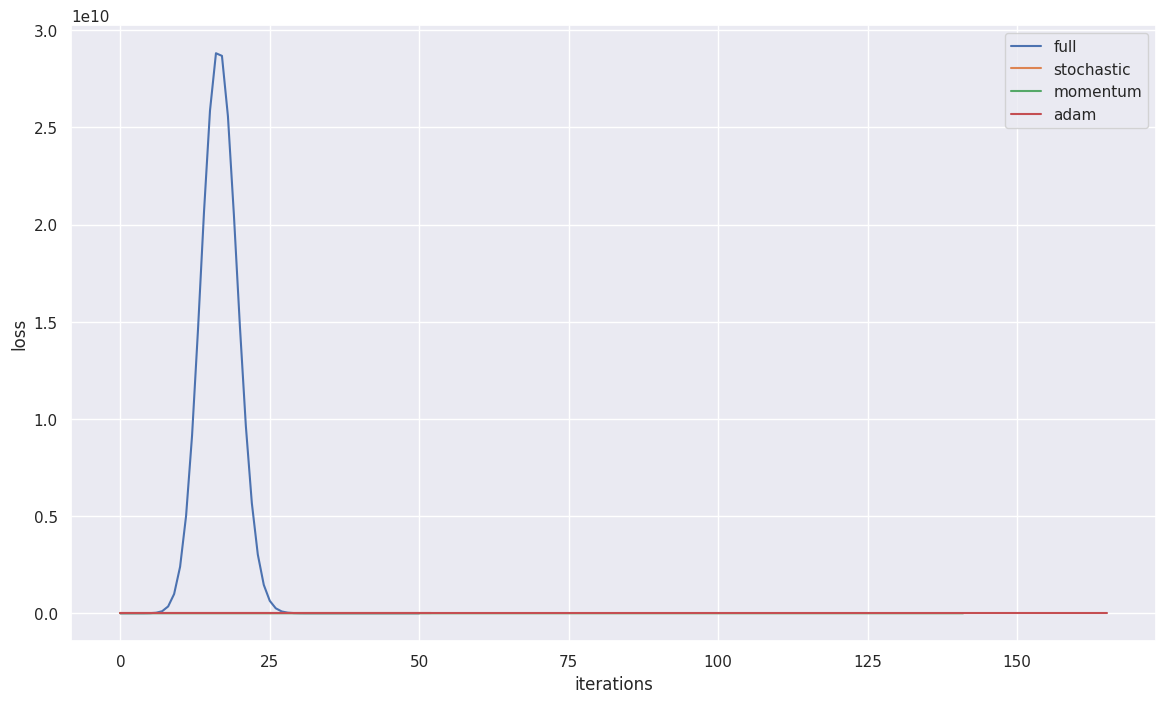

In [163]:
plt.figure(figsize = (14, 8))
for gd_model in gd_models:
  plt.plot(loss_histories[gd_model], label = gd_model)
  plt.xlabel('iterations')
  plt.ylabel('loss')
plt.legend()
plt.show()

Выглядит неинформативно, поэтому покажу на разных графиках

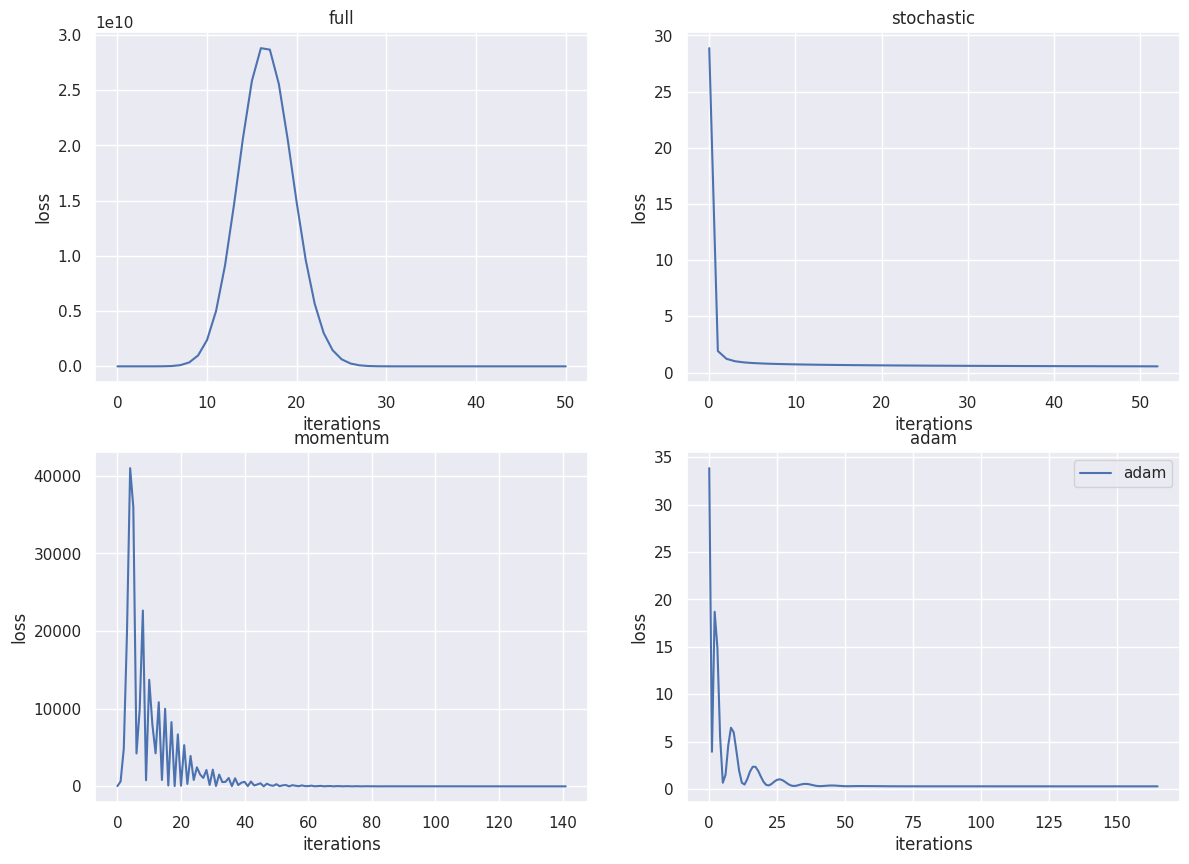

In [167]:
plt.figure(figsize = (14, 10))
for gd_model, i in zip(gd_models, range(1, 5)):
  plt.subplot(2, 2, i)
  plt.plot(loss_histories[gd_model], label = gd_model)
  plt.title(gd_model)
  plt.xlabel('iterations')
  plt.ylabel('loss')
plt.legend()
plt.show()

Лучший $R^2$ был у `adam`, при этом лучший test losses был у `momentum`. В  `stochastic` коэффициент регуляризации сильно ниже, чем в отсальных, а число итераций наименьшее у `full` и `stochastic`

При этом графиик довольно сильно отличаются:

У `full` ошибка сразу очень маленькая.

У `stochastic` сначала ошибка большая, но резко падает.

У `momentum` ошибка очень сильно колеблется, но постепенно уменьшается и на большом количестве итераций становится нулевой.

У `adam` траектория ошибки нечто среднее между стохастиком и моментумом

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [168]:
a = [1, 2, 3]
np.mean(a)

2.0

In [171]:
import time
batch_sizes = np.arange(5, 500, 10)
n_iters_batch = dict()
n_time_batch = dict()
k = 10
for batch_size in tqdm(batch_sizes):
  n_iter_list= []
  n_time_list = []
  model = LinearRegression(descent_config = {'descent_name': 'stochastic', 'kwargs': {'dimension': X_train.shape[1], 'lambda_': best_lambdas_['stochastic'], 'batch_size' : batch_size}})
  for _ in range(k):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    time_i = end - start
    n_iter_list.append(len(model.loss_history))
    n_time_list.append(time_i)
  n_iters_batch[batch_size] = np.mean(n_iter_list)
  n_time_batch[batch_size] = np.mean(n_time_list)

  0%|          | 0/50 [00:00<?, ?it/s]

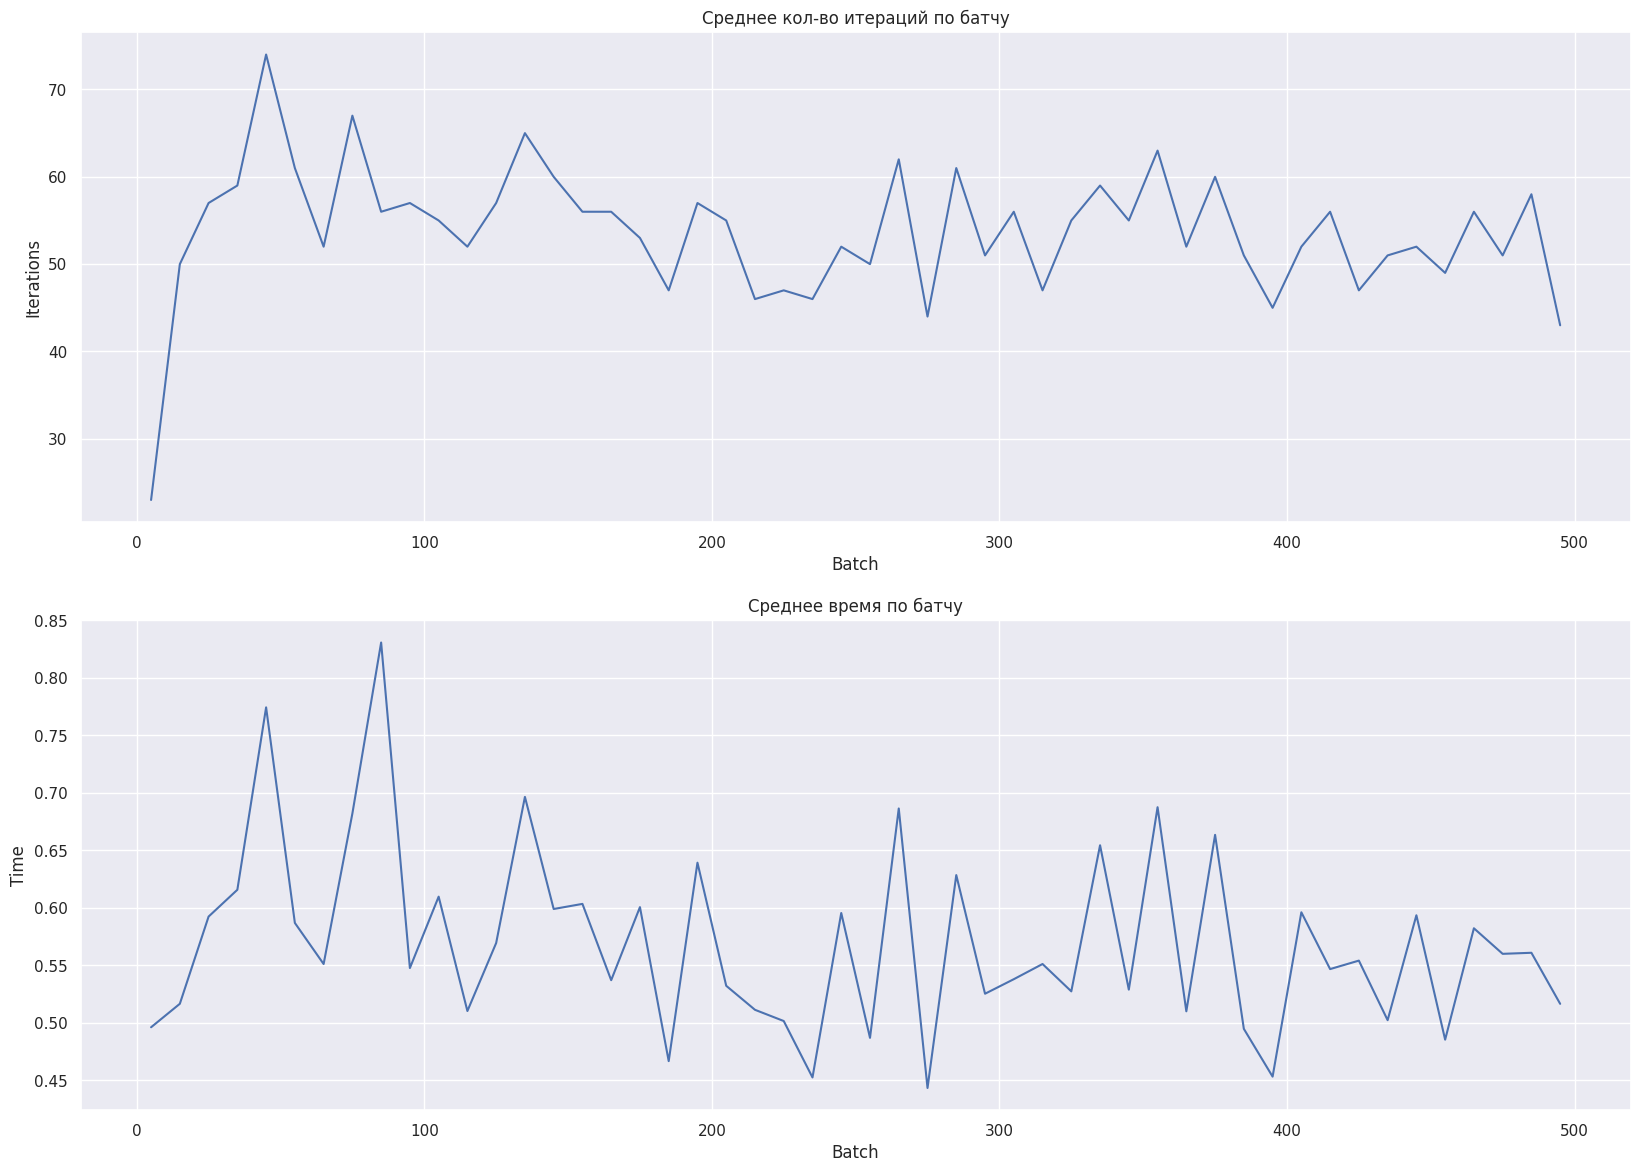

In [178]:
plt.figure(figsize = (20, 14))
plt.subplot(2, 1, 1)
plt.plot(n_iters_batch.keys(), n_iters_batch.values())
plt.title('Среднее кол-во итераций по батчу')
plt.xlabel('Batch')
plt.ylabel('Iterations')
plt.subplot(2, 1, 2)
plt.plot(n_time_batch.keys(), n_time_batch.values())
plt.title('Среднее время по батчу')
plt.xlabel('Batch')
plt.ylabel('Time')
plt.show()

При увеличении размера батча количество итераций сначала растет, а потом снижается до какого-то небольшого интервала. График времени сходимости коинтегрирован с итерациями и имеет схожую тендецию - сначала расти, затем уменьшаттся определенного интервала

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96426013/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [212]:
train_losses_reg = dict()
test_losses_reg = dict()
R2_reg = dict()
best_lambdas_reg = dict()
n_iter_reg = dict()
mu_reg = dict()
gd_models = ['full', 'stochastic', 'momentum', 'adam']

for gd_model in tqdm(gd_models):
  best_mse = 10 ** 10
  best_lambda_ = 10 ** 10
  best_mu = 10 ** 10
  for lambda_ in tqdm(np.logspace(-4, 0, 4)):
    for mu in tqdm(np.logspace(-3, 0, 4)):
      model = LinearRegression(descent_config = {'descent_name': gd_model, 'regularized': True, 'kwargs': {'dimension': X_train.shape[1],'lambda_': lambda_, 'mu' : mu}})
      model.fit(X_train, y_train)
      y_pred = model.predict(X_val)
      mse = model.calc_loss(X_val, y_val)
      if mse < best_mse:
        best_mse = mse
        best_lambda_ = lambda_
        best_mu = mu
  model = LinearRegression(descent_config = {'descent_name': gd_model, 'regularized': True, 'kwargs': {'dimension': X_train.shape[1],'lambda_': best_lambda_, 'mu' : mu}})
  model.fit(X_train, y_train)
  train_losses_reg[gd_model] = model.calc_loss(X_train, y_train)
  test_losses_reg[gd_model] = model.calc_loss(X_test, y_test)
  y_pred = model.predict(X_test)
  R2_reg[gd_model] = r2_score(y_test, y_pred)
  n_iter_reg[gd_model] = len(model.loss_history)
  best_lambdas_reg[gd_model] = best_lambda_
  mu_reg[gd_model] = best_mu


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [214]:
res_reg = pd.DataFrame(np.array([list(train_losses_reg.values()), list(test_losses_reg.values()), list(R2_reg.values()), list(best_lambdas_reg.values()),  list(mu_reg.values()), list(n_iter_reg.values())]), index = ['train loss', 'test loss', 'R^2', 'best_lambda', 'mu', 'iterations'], columns = gd_models)
res_reg

,full,stochastic,momentum,adam
train loss,5.008761,6.440495,1.272722,5.835198
test loss,5.001141,6.437803,1.262604,5.827790
R^2,-3.122159,-4.306319,-0.040693,-3.803519
best_lambda,1.000000,1.000000,1.000000,1.000000
mu,0.010000,0.001000,0.001000,0.001000
iterations,301.000000,301.000000,301.000000,301.000000


In [215]:
loss_histories_cosh = dict()
for gd_model in tqdm(gd_models):
  model = LinearRegression(descent_config = {'descent_name': gd_model, 'kwargs': {'dimension': X_train.shape[1],'lambda_': best_lambdas_cosh[gd_model]}})
  model.fit(X_train, y_train)
  loss_histories_cosh[gd_model] = model.loss_history

  0%|          | 0/4 [00:00<?, ?it/s]

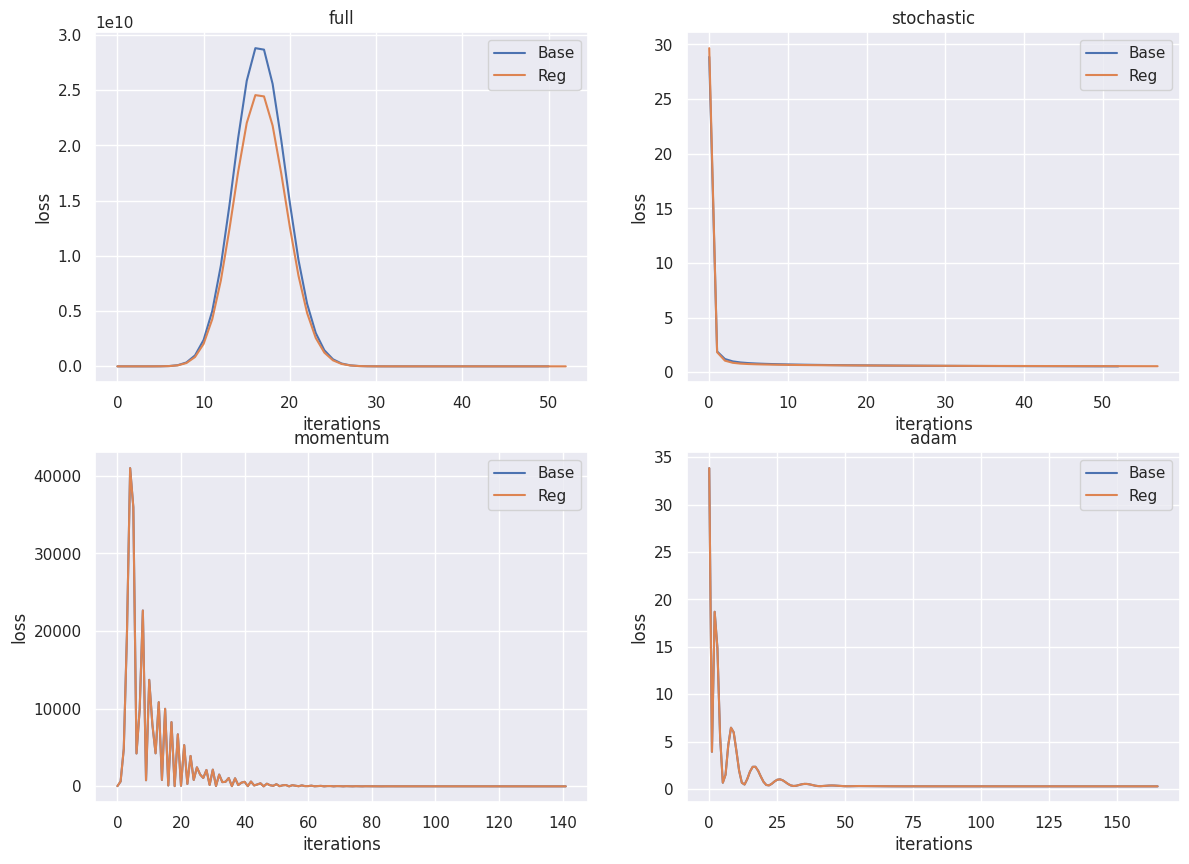

In [218]:
plt.figure(figsize = (14, 10))
for gd_model, i in zip(gd_models, range(1, 5)):
  plt.subplot(2, 2, i)
  plt.plot(loss_histories[gd_model], label = 'Base')
  plt.plot(loss_histories_cosh[gd_model], label = 'Reg')
  plt.title(gd_model)
  plt.xlabel('iterations')
  plt.ylabel('loss')
  plt.legend()
plt.show()

Cходимость у reg хуже, чем у базовой модели и предсказания хуже

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [189]:
from descents import LossFunction
LossFunction = LossFunction.LogCosh
train_losses_cosh = dict()
test_losses_cosh = dict()
R2_cosh = dict()
best_lambdas_cosh = dict()
n_iter_cosh = dict()
gd_models = ['full', 'stochastic', 'momentum', 'adam']

for gd_model in tqdm(gd_models):
  best_mse = 10 ** 10
  best_lambda_ = 10 ** 10
  for lambda_ in tqdm(np.logspace(-6, 1, 10)):
    model = LinearRegression(descent_config = {'descent_name': gd_model, 'kwargs': {'dimension': X_train.shape[1],'lambda_': lambda_, 'loss_function': LossFunction.LogCosh}})
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = model.calc_loss(X_val, y_val)
    if mse < best_mse:
      best_mse = mse
      best_lambda_ = lambda_
  model = LinearRegression(descent_config = {'descent_name': gd_model, 'kwargs': {'dimension': X_train.shape[1],'lambda_': best_lambda_, 'loss_function': LossFunction.LogCosh}})
  model.fit(X_train, y_train)
  train_losses_cosh[gd_model] = model.calc_loss(X_train, y_train)
  test_losses_cosh[gd_model] = model.calc_loss(X_test, y_test)
  y_pred = model.predict(X_test)
  R2_cosh[gd_model] = r2_score(y_test, y_pred)
  n_iter_cosh[gd_model] = len(model.loss_history)
  best_lambdas_cosh[gd_model] = best_lambda_


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
res_cosh = pd.DataFrame(np.array([list(train_losses_cosh.values()), list(test_losses_cosh.values()), list(R2_cosh.values()), list(best_lambdas_cosh.values()), list(n_iter_cosh.values())]), index = ['train loss', 'test loss', 'R^2', 'best_lambda', 'iterations'], columns = gd_models)

In [196]:
print('MSE')
res

MSE


,full,stochastic,momentum,adam
train loss,0.363863,0.502891,0.573856,0.290865
test loss,0.362777,0.504142,0.583252,0.296662
R^2,0.700984,0.584464,0.519258,0.755478
best_lambda,1.668101,0.278256,1.668101,1.668101
iterations,57.000000,51.000000,118.000000,166.000000


In [199]:
print('Cosh')
res_cosh

Cosh


,full,stochastic,momentum,adam
train loss,0.354319,0.502891,0.573856,0.290865
test loss,0.355037,0.504142,0.583252,0.296662
R^2,0.707363,0.584464,0.519258,0.755478
best_lambda,1.668101,0.278256,1.668101,1.668101
iterations,52.000000,51.000000,118.000000,166.000000


Показатели никак не изменились

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

[Мясо по-французски из индейки](https://rutxt.ru/node/11822)
[Фото](https://drive.google.com/file/d/1MfxubI_HrINT2xMyCZgWg3DSSEzAq3qn/view?usp=drive_link)


### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: